In [78]:
# 导入相关的库

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import squarify
import warnings
import gc
from datetime import datetime,timedelta
%matplotlib inline
warnings.filterwarnings('ignore')


In [79]:
# 对数据进行不放回抽样，抽去前500万行的数据
data = pd.read_csv('/Users/fq/Desktop/UserBehavior.csv',nrows= 5000000)

data.head(5)

,1,2268318,2520377,pv,1511544070
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [80]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   1           int64 
 1   2268318     int64 
 2   2520377     int64 
 3   pv          object
 4   1511544070  int64 
dtypes: int64(4), object(1)
memory usage: 190.7+ MB


In [81]:
# 以userdata.csv保存输出：
data.to_csv('/Users/fq/Desktop/Userdata.csv')

In [82]:
# 数据集缺少标题列，使用pandas做简单的数据修改
file_path = '/Users/fq/Desktop/Userdata.csv'
df = pd.read_csv(file_path)             #保存为DataFrame格式，存入变量df
df.head()

,Unnamed: 0,1,2268318,2520377,pv,1511544070
0,0,1,2333346,2520771,pv,1511561733
1,1,1,2576651,149192,pv,1511572885
2,2,1,3830808,4181361,pv,1511593493
3,3,1,4365585,2520377,pv,1511596146
4,4,1,4606018,2735466,pv,1511616481


In [83]:
# 删除数据集的首列,设置列索引名
del df['Unnamed: 0']
df.columns = ['user_id', 'item_id', 'category_id', 'behaviour_type', 'timestamp']
df.info()     # 数据五个特征，共占用内存190.7M
df.head()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   category_id     int64 
 3   behaviour_type  object
 4   timestamp       int64 
dtypes: int64(4), object(1)
memory usage: 190.7+ MB


,user_id,item_id,category_id,behaviour_type,timestamp
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [84]:
# 保存新文件，替换原始数据集
df.to_csv('/Users/fq/Desktop/Userdata.csv')

In [85]:
# 数据清洗 
# 计算重复值，并删除：
print('重复数据有：',df.duplicated().sum())   # 重复数据有5个
df = df.drop_duplicates()
print('删除后，重复数据有：',df.duplicated().sum())  #删除重复值

重复数据有： 5
删除后，重复数据有： 0


In [86]:
# 查看各字段的缺失值数量：
df.isnull().sum()   # 无缺失字段

user_id           0
item_id           0
category_id       0
behaviour_type    0
timestamp         0
dtype: int64

In [87]:
# 日期与时间段的处理

#原始数据的时间格式是英国时区，换成中国东八区需要+8小时
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')+timedelta(hours = 8)
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.hour
df.head()

,user_id,item_id,category_id,behaviour_type,timestamp,date,time
0,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,6
1,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,9
2,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15
3,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15
4,1,4606018,2735466,pv,2017-11-25 21:28:01,2017-11-25,21


In [88]:
# 数据的异常值处理
# 找出日期小于2017-11-25日的值，并删除：
df[df['timestamp']<datetime(2017,11,25)].index      #小于日期小于2017-11-25日的值为2600行

Int64Index([   4169,    7989,    7990,   10850,   11393,   18407,   18573,
              20068,   20069,   20489,
            ...
            4978177, 4982469, 4982478, 4985445, 4989008, 4991273, 4992338,
            4992339, 4992340, 4992341],
           dtype='int64', length=2600)

In [89]:
df.drop(df[df['timestamp']<datetime(2017,11,25)].index,inplace=True)
df.info()    # 原行数5000000，删除后4997395

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997395 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         int64         
 1   item_id         int64         
 2   category_id     int64         
 3   behaviour_type  object        
 4   timestamp       datetime64[ns]
 5   date            object        
 6   time            int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 305.0+ MB


In [90]:
# 找出日期大于2017-12-04日的值，并删除：
df[df['timestamp']>datetime(2017,12,4)].time.count()      #小于日期大于2017-12-04日的值为32行

32

In [91]:
df.drop(df[df['timestamp']>datetime(2017,12,4)].index,inplace=True)
df.info()            # 原行数4997395，删除后4997363

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997363 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         int64         
 1   item_id         int64         
 2   category_id     int64         
 3   behaviour_type  object        
 4   timestamp       datetime64[ns]
 5   date            object        
 6   time            int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 305.0+ MB


In [92]:
# 数据分析 可视化处理：
# 1、数据整体情况
# 1.1 访问用户总数UV、页面总访问量PV、人均浏览次数、成交量
UV = df['user_id'].unique().size
PV = df[df['behaviour_type'] == 'pv'].user_id.count()
user_per = PV/UV
buy_count = df[df['behaviour_type'] == 'buy'].user_id.count()
print('计算各值为：',UV,PV,user_per,buy_count)

计算各值为： 48984 4472599 91.30734525559366 100126


In [93]:
# 1.2 日均访问用户UV、日均页面访问量PV、人均浏览次数、成交量

st_perday = df[['user_id','date']].groupby('date').count()
st_perday['pv_perday'] = df[df['behaviour_type'] == 'pv'][['behaviour_type','date']].groupby('date').count()
st_perday['deep_perday'] = st_perday['user_id']/st_perday['pv_perday']
st_perday['buy_perday'] = df[df['behaviour_type'] == 'buy'][['behaviour_type','date']].groupby('date').count()
st_perday.columns = ['日访客数','日浏览数','日人均浏览数','日成交量']
st_perday.index.name = '日期'
st_perday

,日访客数,日浏览数,日人均浏览数,日成交量
日期,,,,
2017-11-25,513948,461170,1.114444,9889
2017-11-26,531631,476245,1.116297,10091
2017-11-27,499919,446740,1.119038,11088
2017-11-28,492497,440340,1.118447,10562
2017-11-29,510914,456976,1.118032,11145
2017-11-30,521171,467215,1.115484,11007
2017-12-01,543502,486101,1.118085,10508
2017-12-02,695569,622231,1.117863,12883
2017-12-03,688212,615581,1.117988,12953


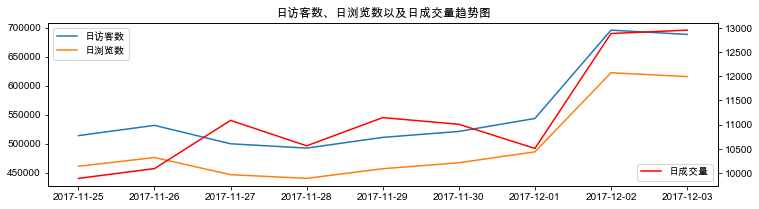

In [97]:
# 解决中文显示问题
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(12,3))
plt.plot(st_perday[['日访客数','日浏览数']])
plt.legend(labels = ['日访客数','日浏览数'],loc = 2)
plt.twinx()
plt.plot(st_perday[['日成交量']],color = 'red')
plt.legend(['日成交量'],loc =4)
plt.title('日访客数、日浏览数以及日成交量趋势图')
plt.savefig('1.png',dpi = 600)
plt.show()

12月2,3号是周六日，其数值同比上周增长幅度较大，应该是双12活动开始预热。

In [98]:
# 1.3 用户的复购率和跳失率

buy_count = df[df['behaviour_type'] == 'buy'].user_id.count()
a = df[df['behaviour_type'] == 'buy']['user_id'].value_counts()>=2
re_buy = a[a].size
# 计算复购率：
re_buy_rate = (re_buy / buy_count) *100
print('复购次数：%i\n实际购买次数：%i\n复购率：%.2f%%'%(re_buy,buy_count,re_buy_rate))
# 计算跳失率：
a = df[df['behaviour_type']=='pv']['user_id'].value_counts()==1
a = a[a].size/UV*100
print('跳失率为：%0.5f%%'%a)

复购次数：21892
实际购买次数：100126
复购率：21.86%
跳失率为：0.06941%


数量级为10万的情况下，复购率为65.87%，但是在数量级为5百万的情况下复购为仅为21.92%。

数量级是非常重要的，在可能的情况还是有分析尽可能多的数据。

复购率反映的是用户的粘性，忠诚度，不同的复购率会采取不用运营策略。

复购率如果小于15%，运营策略应该重点放在新客获取上，

复购率超过60%则应该放在忠诚客户维系上。

处在中间则应采用混合模式。

针对于本数据的21%的复购率，我们应该考虑在获取新用户的同时，提高旧用户的用户黏度。

该数量的用户跳失率相对较低。

In [99]:
print('回收内存数量：')
del PV
del UV
del a
del buy_count
del re_buy
del re_buy_rate
del st_perday
del user_per
gc.collect()    #  强制对所有代进行垃圾回

回收内存数量：


61048

In [100]:
# 2、用户行为转化分析
# 2.1 基于行为转化漏斗分析
be_value = df[['user_id','behaviour_type']].groupby('behaviour_type').count().sort_values(by = 'user_id')
be_value.index.name='行为分布值'
be_value

,user_id
行为分布值,
buy,100126
fav,145125
cart,279513
pv,4472599


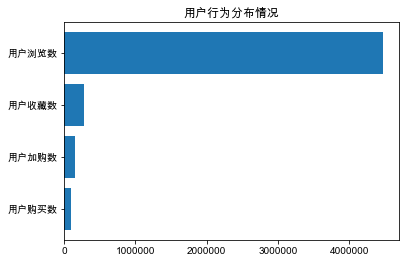

In [103]:
# 绘制用户行为分布条形图：
y = be_value['user_id']
x = ['用户购买数','用户加购数','用户收藏数','用户浏览数']
plt.barh(x,y)
plt.title("用户行为分布情况")
plt.savefig('2.png',dpi = 600)
plt.show()

浏览后的加购的转化率为6.24%

浏览后的收藏的转化率为3.24%

浏览后的购买的转化率为2.23%

可以看出用户在浏览后的行为转化率都较低，那么用户转化是否也是如此？

In [104]:
# 2.2 基于用户转化漏斗分析:
pv_user = df[df['behaviour_type'] == 'pv']['user_id'].unique().size
cart_user = df[df['behaviour_type'] == 'cart']['user_id'].unique().size
fav_user = df[df['behaviour_type'] == 'fav']['user_id'].unique().size
buy_user = df[df['behaviour_type'] == 'buy']['user_id'].unique().size
be_user = {'浏览用户数':pv_user,'加购用户数':cart_user,'收藏用户数':fav_user,'购买用户数':buy_user}
be_user = pd.Series(be_user)
be_user

浏览用户数    48782
加购用户数    36906
收藏用户数    19489
购买用户数    33286
dtype: int64

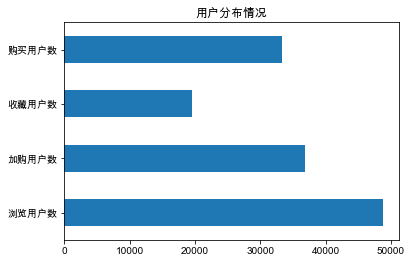

In [105]:
# 绘制用户分布条形图：
be_user.plot(kind='barh')
plt.title("用户分布情况")
plt.savefig('2.png',dpi = 600)
plt.show()

用户浏览后加购的转化率为75.49%

用户浏览后收藏的转化率为39.77%

用户浏览后购买的转化率为68.03%

由上图可以看出，用户并未在点击后就大量流失,而且有高达68.03%的付费转化率。结合业务场景分析，行为转化率较低的原因是用户要对同种产品进行比较，以及单纯的浏览商品。还有为什么收藏用户数远小于加购的用户数？结合业务场景，推测可能因为收藏后不可以直接购买，但是加购后可以直接购买。可以引导用户将单纯的收藏行为，转化为收藏并加购，来提升用户购买转化率。

In [106]:
# 3、 用户行为习惯分析
# 3.1 整体用户行为活跃情况：
# time_browse = df.groupby(['hour','behaviour_type'])['user_id'].count().unstack()
# time_browse.columns = ['购买','加购','收藏','浏览']
# time_browse.index.set_names('小时',inplace=True)
# print('整体用户行为按小时分布表')
# time_browse

time_browse = df.groupby(['time','behaviour_type'])['user_id'].count().unstack()
time_browse.columns = ['购买','加购','收藏','浏览']
time_browse.index.name = '小时'
print('整体用户行为按小时分布表')
time_browse

整体用户行为按小时分布表


,购买,加购,收藏,浏览
小时,,,,
0,2916,9181,5070,149884
1,1101,4164,2295,68466
2,603,2150,1403,37536
3,302,1664,911,26422
4,328,1410,797,22544
5,380,1992,919,28039
6,922,3967,2169,60113
7,1845,7486,3843,111536
8,3186,9906,5409,154485


<Figure size 1080x216 with 0 Axes>

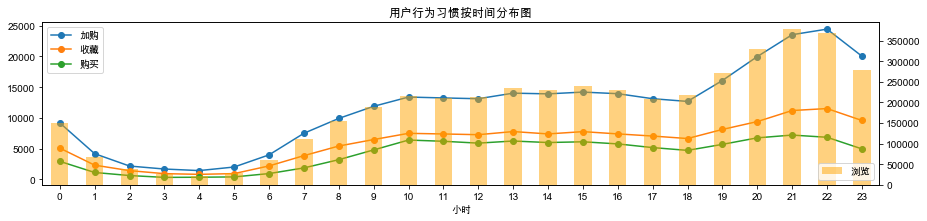

In [107]:
# 绘制整体用户行为活跃情况折线图：
plt.figure(figsize=(15,3))
time_browse[['加购','收藏','购买']].plot(style = '-o')
plt.legend(loc = 2)
plt.title('用户行为习惯按时间分布图')
plt.xlabel('小时')
plt.twinx()
time_browse['浏览'].plot(kind = 'bar',figsize=(15,3),facecolor = 'orange',alpha = 0.5)
plt.legend(loc=4)
plt.savefig('3.png',dpi = 600)
plt.show()

由上图可知，每日0点至3点用户活跃度迅速下降，降到最低值，4点到10点用户活跃度开始上升，10点至18点用户活跃度较平稳，18点后用户活跃度开始快速上升，并在20-22时达到一天中用户活跃度的最高值，符合人群的作息规律。根据用户不同活跃情况制定不同的运营策略，在用户活跃高峰期增加广告以及运营手段的投入，达到更高用户转化率。

In [26]:
# 4 用户类目偏好分析
# 4.1 不同商品购买次数分析：
print('本次分析的产品类目数量为：%i \n商品数量为：%i'%(df['category_id'].unique().size,df['item_id'].unique().size))

本次分析的产品类目数量为：7352 
商品数量为：1080286


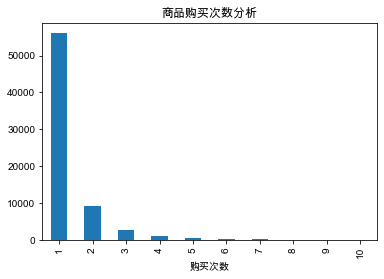

In [108]:
# 商品购买次数排名：
buy_count = df[df['behaviour_type'] == 'buy'].groupby('item_id')['user_id'].count()
buy_count = buy_count.value_counts(sort = True)[:10]
buy_count
buy_count.plot(kind = 'bar')
plt.title('商品购买次数分析')
plt.xlabel('购买次数')
plt.savefig('4.png',dpi = 600)
plt.show()

购买商品一次的占所有商品比为5.20%
购买商品二次的占所有商品比为0.85%
购买商品三次的占所有商品比为0.25%

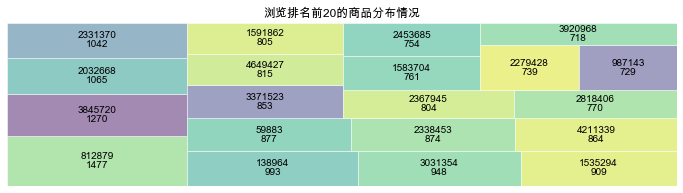

In [116]:
# 4.2 不同行为下的排名前20的商品：
# 浏览排名前20的商品:
# b = df[df['behaviour_type']=='pv'].groupby('item_id')['user_id'].count().sort_values(ascending =False)[:20]
# plt.figure(figsize= (12,3))
# # squarify.plot(sizes=b.values,label=b.index,value = b.values,alpha = 0.5)
# plt.axis('off')
# plt.title('浏览排名前20的商品分布情况',fontdict = {'fontsize':15})
# plt.tight_layout()

be_pv = df[df['behaviour_type'] == 'pv'].groupby('item_id')['user_id'].count().sort_values(ascending = False)[:20]
plt.figure(figsize=(12,3))
squarify.plot(sizes = be_pv.values,label=be_pv.index,value=be_pv.values,alpha = 0.5,edgecolor = 'white')
# 除去坐标轴
plt.axis('off')
# 除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
plt.title('浏览排名前20的商品分布情况')
plt.savefig('3.png',dpi = 600)
plt.show()

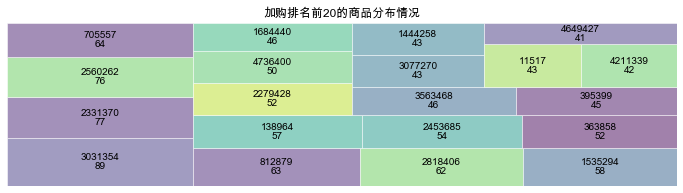

In [117]:
# 加购排名前20的商品:
be_cart = df[df['behaviour_type'] == 'cart'].groupby('item_id')['user_id'].count().sort_values(ascending = False)[:20]
plt.figure(figsize=(12,3))
squarify.plot(sizes = be_cart.values,label=be_cart.index,value=be_cart.values,alpha = 0.5,edgecolor = 'white')
# 除去坐标轴
plt.axis('off')
# 除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
plt.title('加购排名前20的商品分布情况')
plt.savefig('3.png',dpi = 600)
plt.show()

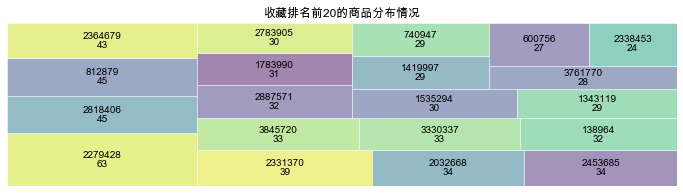

In [118]:
# 收藏排名前20的商品:
be_fav = df[df['behaviour_type'] == 'fav'].groupby('item_id')['user_id'].count().sort_values(ascending = False)[:20]
plt.figure(figsize=(12,3))
squarify.plot(sizes = be_fav.values,label=be_fav.index,value=be_fav.values,alpha = 0.5,edgecolor = 'white')
# 除去坐标轴
plt.axis('off')
# 除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
plt.title('收藏排名前20的商品分布情况')
plt.savefig('4.png',dpi = 600)
plt.show()

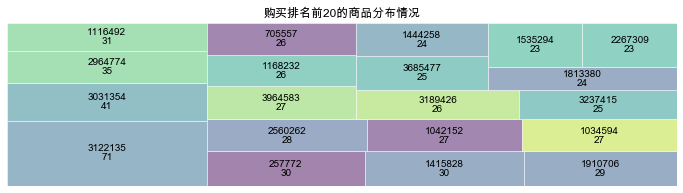

In [119]:
# 购买排名前20的商品:
be_buy = df[df['behaviour_type'] == 'buy'].groupby('item_id')['user_id'].count().sort_values(ascending = False)[:20]
plt.figure(figsize=(12,3))
squarify.plot(sizes = be_buy.values,label=be_buy.index,value=be_buy.values,alpha = 0.5,edgecolor = 'white')
# 除去坐标轴
plt.axis('off')
# 除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
plt.title('购买排名前20的商品分布情况')
plt.savefig('5.png',dpi = 600)
plt.show()

In [120]:
print('浏览排名前20的商品有%i件是加购，%i件收藏，%i件购买 \n加购排名前20的商品有%i件是购买的\n收藏排名前20的商品有%i件是购买的'
%(be_pv[be_pv.index.isin(be_cart.index)].count(),
  be_pv[be_pv.index.isin(be_fav.index)].count(),
  be_pv[be_pv.index.isin(be_buy.index)].count(),
  be_cart[be_cart.index.isin(be_buy.index)].count(),
  be_fav[be_fav.index.isin(be_buy.index)].count()
))

浏览排名前20的商品有10件是加购，10件收藏，2件购买 
加购排名前20的商品有5件是购买的
收藏排名前20的商品有1件是购买的


可以看出浏览最多的商品和购买最多的商品差别略大，最吸引用的产品却没有很好的转化成销量，应调整相关商品的运营策略，减少差距。同时，可以看出收藏的行为距离购买的行为较远，更应鼓励用户多进行加购行为。

# 5、用户价值分析：
用户RFM分层理论： RFM是3个指标的缩写，最近一次消费时间间隔（Recency），消费频率
（Frequency），消费金额（Monetary）。而RFM模型就是通过这三项指标，来描述客户的价值状况，从而得到
分群的客户。其中
R是指用户的最近一次消费时间距现在有多长时间了，这个指标反映用户流失与复购（粘性）。
F是指用户在指定观察的周期内消费了几次。这个指标反映了用户的消费活跃度（忠诚度）。
M是指用户在指定的观察周期内在平台花了多少钱，这个指标反映用户对公司贡献的价值（营收）。


由于数据集的统计的时间仅有9天，而且没有消费数据，只能根据消费频率以及消费时间进行分析，规则设置如下：


In [62]:
# 用户价值指标计算：
# 购买时间间隔：
R_day = (datetime(2017,12,4) - df[df['behaviour_type'] == 'buy']['timestamp']).dt.days
a = df[df.index.isin(R_day.index)].user_id
a=pd.DataFrame(list(zip(a, R_day)))
a.drop_duplicates()
a = a.groupby(0).min()
a['id'] = a.index
a = a.sort_values(by = 'id')
# 购买频率
buy_count = df[df['behaviour_type'] == 'buy'].user_id.value_counts().sort_index()
user_value = pd.DataFrame(list(zip(buy_count,a[1])),index=buy_count.index)
user_value.columns = ['消费频次','购买时间间隔']
user_value.index.set_names('用户ID',inplace = True)
print('用户消费频次，购买时间间隔统计表')
user_value

用户消费频次，购买时间间隔统计表


,消费频次,购买时间间隔
用户ID,,
27,2,2
100,8,5
117,10,5
119,3,4
121,1,8
...,...,...
1017960,3,0
1017965,1,6
1017972,4,4


In [63]:
#计算价值分数
user_value['R值'] = pd.cut(user_value['购买时间间隔'],bins= [-1,2,4,7,9],labels = [4,3,2,1])
user_value['F值'] = pd.cut(user_value['消费频次'],bins =[0,10,20,30,90],labels=[1,2,3,4])
#将分类数据转化为数值类型
user_value[['R值','F值']] = user_value[['R值','F值']].apply(pd.to_numeric)
print('用户价值分层表')
user_value

用户价值分层表


,消费频次,购买时间间隔,R值,F值
用户ID,,,,
27,2,2,4,1
100,8,5,2,1
117,10,5,2,1
119,3,4,3,1
121,1,8,1,1
...,...,...,...,...
1017960,3,0,4,1
1017965,1,6,2,1
1017972,4,4,3,1


In [70]:
#客户分层函数
def customer_type(frame):
    customer_type = []
    for i in range(len(frame)):
        if frame.iloc[i,2]>=3 and frame.iloc[i,3]>=3:
            customer_type.append('重要价值客户')
        elif frame.iloc[i,2]>=1 and frame.iloc[i,3]>=3:
            customer_type.append('重要保存客户')
        elif frame.iloc[i,2]>=3 and frame.iloc[i,3]>=1:
            customer_type.append('重要发展客户')
        elif frame.iloc[i,2]>=1 and frame.iloc[i,3]>=1:
            customer_type.append('重要挽留客户')
    frame['classification'] = customer_type
customer_type(user_value)
user_value

,消费频次,购买时间间隔,R值,F值,classification
用户ID,,,,,
27,2,2,4,1,重要发展客户
100,8,5,2,1,重要挽留客户
117,10,5,2,1,重要挽留客户
119,3,4,3,1,重要发展客户
121,1,8,1,1,重要挽留客户
...,...,...,...,...,...
1017960,3,0,4,1,重要发展客户
1017965,1,6,2,1,重要挽留客户
1017972,4,4,3,1,重要发展客户


In [71]:
print('客户分类统计值：')
user_value.classification.value_counts()

客户分类统计值：


重要发展客户    25587
重要挽留客户     7599
重要价值客户       97
重要保存客户        3
Name: classification, dtype: int64

回收内存：


NameError: name 'be_user' is not defined